# Tensorflow and CNN 
#Google colab


In [0]:
from tensorflow.python.client import device_lib

In [0]:
print("Show System RAM Memory:\n\n") 
!cat /proc/meminfo | egrep "MemTotal*" 

Show System RAM Memory:


MemTotal:       13335276 kB


In [0]:
print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices())) 



Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15605414012023638704
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4192316904223629090
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6780210740157400529
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18214365775378353489
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [0]:
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/train/', target_size = (50, 50),batch_size = 32, class_mode = 'binary') 

Found 0 images belonging to 0 classes.


 A Keras code is provided for running hand written recognition on both GPU and CPU. Run the code on colab and your own machine and compare the results.

For colab

In [0]:
import time 
start = time.time() 
!python3 "/content/gdrive/My Drive/mnist_cnn.py" 
end = time.time() 
print(end - start)

Using TensorFlow backend.
11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
2019-05-18 18:49:13.463767: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-05-18 18:49:13.464066: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x1be5fa0 executing computations on platform Host. Devices:
2019-05-18 18:49:13.464099: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-05-18 18:49:13.624266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value

For CPU

In [34]:
import time 
start = time.time() 
%run C:\Users\arroj\Downloads/mnist_cnn 
end = time.time() 
print(end - start) 

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.2843 - acc: 0.9124 - val_loss: 0.0608 - val_acc: 0.9805
Epoch 2/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0944 - acc: 0.9715 - val_loss: 0.0422 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0707 - acc: 0.9788 - val_loss: 0.0378 - val_acc: 0.9864
Epoch 4/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0576 - acc: 0.9824 - val_loss: 0.0352 - val_acc: 0.9874
Epoch 5/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0513 - a

Colob speed is about 63 seconds but the cpu speed is around 2137 seconds

Step2. Implement handwritten recognition in Tensorflow using CNN 

In [0]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data 


In [0]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True) 


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
batch_size = 128 
import matplotlib.pyplot as plt 
import random as ran 
import numpy as np 


In [0]:
# Functions that can define the size of train and test sets 
train_X = mnist.train.images.reshape(-1, 28, 28, 1) 
test_X = mnist.test.images.reshape(-1,28,28,1)

In [0]:
train_y = mnist.train.labels 
test_y = mnist.test.labels

In [0]:
x = tf.placeholder("float", [None, 28,28,1]) 
y = tf.placeholder("float", [None, 10])

In [0]:
def conv2d(x, W, b, strides=1):
 # Conv2D wrapper, with bias and relu activation
 x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
 x = tf.nn.bias_add(x, b)
 return tf.nn.relu(x)
def maxpool2d(x, k=2):
 return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k,
1],padding='SAME')

In [0]:
weights = {
 'wc1': tf.get_variable('W0', shape=(3,3,1,32),
initializer=tf.contrib.layers.xavier_initializer()),
 'wc2': tf.get_variable('W1', shape=(3,3,32,64),
initializer=tf.contrib.layers.xavier_initializer()),
 'wc3': tf.get_variable('W2', shape=(3,3,64,128),
initializer=tf.contrib.layers.xavier_initializer()),
 'wd1': tf.get_variable('W3', shape=(4*4*128,128),
initializer=tf.contrib.layers.xavier_initializer()),
 'out': tf.get_variable('W6', shape=(128,10),
initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
 'bc1': tf.get_variable('B0', shape=(32),
initializer=tf.contrib.layers.xavier_initializer()),
 'bc2': tf.get_variable('B1', shape=(64),
initializer=tf.contrib.layers.xavier_initializer()),
 'bc3': tf.get_variable('B2', shape=(128),
initializer=tf.contrib.layers.xavier_initializer()),
 'bd1': tf.get_variable('B3', shape=(128),
initializer=tf.contrib.layers.xavier_initializer()),
 'out': tf.get_variable('B4', shape=(10),
initializer=tf.contrib.layers.xavier_initializer()),
}


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def conv_net(x, weights, biases):
 # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
  conv1 = conv2d(x, weights['wc1'], biases['bc1'])
 # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
  conv1 = maxpool2d(conv1, k=2)
 # Convolution Layer
 # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
  conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
 # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
  conv2 = maxpool2d(conv2, k=2)
  conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
 # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
  conv3 = maxpool2d(conv3, k=2)
  
  # Fully connected layer
 # Reshape conv2 output to fit fully connected layer input
  fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
  fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
  fc1 = tf.nn.relu(fc1)
 # Output, class prediction
 # finally we multiply the fully connected layer with the weights and add a bias term.
  out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
  return out

In [0]:
learning_rate = 0.001
pred = conv_net(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
#calculate accuracy across all the given images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
init = tf.global_variables_initializer()
epochs = 100
with tf.Session() as sess:
  sess.run(init)
  train_loss = []
  test_loss = []
  train_accuracy = []
  test_accuracy = []
  summary_writer = tf.summary.FileWriter('./Output', sess.graph)
  
  for i in range(epochs):
    for batch in range(len(train_X)//batch_size):
      batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
      batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]
 # Run optimization op (backprop).
 # Calculate batch loss and accuracy
      opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
      loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})
    print("Iter " + str(i) + ", Loss= " + \
      "{:.6f}".format(loss) + ", Training Accuracy= " + \
      "{:.5f}".format(acc))
    print("Optimization Finished!")
 # Calculate accuracy for all 10000 mnist test images
    test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
    train_loss.append(loss)
    test_loss.append(valid_loss)
    train_accuracy.append(acc)
    test_accuracy.append(test_acc)
    print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.022636, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.97140
Iter 1, Loss= 0.008297, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98290
Iter 2, Loss= 0.003383, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98850
Iter 3, Loss= 0.000985, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99030
Iter 4, Loss= 0.000428, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98880
Iter 5, Loss= 0.000569, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99080
Iter 6, Loss= 0.000282, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99030
Iter 7, Loss= 0.000500, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99020
Iter 8, Loss= 0.000168, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99080
Iter 9, Loss= 0.000358, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99000


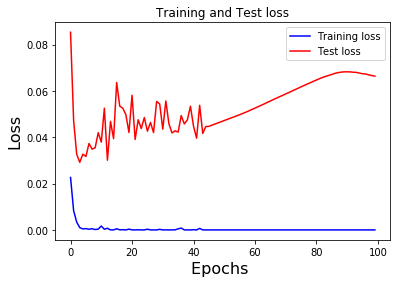

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

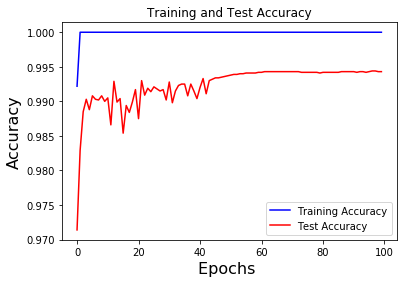

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend()
plt.figure()
plt.show()

Q3 Do you think dropout can help the model ?

Adding a dropout layer will help reduce the overfitting and test accuracy will be improved



In [48]:
import pandas as pd 
import numpy as np
import os
#  Step 3 Text mining using CNN
filepath_dict = {'yelp': 'C:/Users/arroj/Downloads/sentiment labelled sentences/yelp_labelled.txt',
 'amazon': 'C:/Users/arroj/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt',
 'imdb': 'C:/Users/arroj/Downloads/sentiment labelled sentences/imdb_labelled.txt'}

In [49]:
df_list= []
for source, filepath in filepath_dict.items():
    df= pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source']= source # Add another column filled with the source name
    df_list.append(df)

df= pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [50]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [51]:
from sklearn.feature_extraction.text import CountVectorizer 
 
vectorizer = CountVectorizer(min_df=0, lowercase=False) 
vectorizer.fit(sentences) 
vectorizer.vocabulary_ 

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [52]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split 
 
df_yelp = df[df['source'] == 'yelp'] 
 
sentences = df_yelp['sentence'].values 
y = df_yelp['label'].values 
 
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000) 

In [54]:
from sklearn.feature_extraction.text import CountVectorizer 
 
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train) 
 
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test) 
X_train 

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression()

classifier.fit(X_train, y_train) 

score = classifier.score(X_test, y_test) 
 
print("Accuracy:", score)

Accuracy: 0.796


C:\Users\arroj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
# Implementing normal DNN

from keras.models import Sequential 
from keras import layers 

input_dim = X_train.shape[1]  # Number of features 
 
 
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='sigmoid')) # changed from relu to softmax 
model.add(layers.Dense(1, activation='sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy']) 
 
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6956 - acc: 0.4973 - val_loss: 0.6813 - val_acc: 0.5480
Epoch 2/100
750/750 [==============================] - 1s 829us/step - loss: 0.6592 - acc: 0.7000 - val_loss: 0.6679 - val_acc: 0.6560
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6310 - acc: 0.8533 - val_loss: 0.6555 - val_acc: 0.7200
Epoch 4/100
750/750 [==============================] - 1s 887us/step - loss: 0.6028 - acc: 0.8840 - val_loss: 0.6416 - val_acc: 0.7240
Epoch 5/100
750/750 [==============================] - 1s 832us/step - loss: 0.5743 - acc: 0.8960 - val_loss: 0.6280 - val_acc: 0.7360
Epoch 6/100
750/750 [==============================] - 1s 968us/step - loss: 0.5451 - acc: 0.9120 - val_loss: 0.6145 - val_acc: 0.7480
Epoch 7/100
750/750 [==============================] - 1s 913us/step - loss: 0.5149 - acc: 0.9187 - val_loss: 0.5998 - val_acc: 0.7520
Epoch 8/100
7

In [57]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot') 
 
def plot_history(history):     
    acc = history.history['acc']     
    val_acc = history.history['val_acc']     
    loss = history.history['loss']     
    val_loss = history.history['val_loss']     
    x = range(1, len(acc) + 1) 
 
    plt.figure(figsize=(12, 5))     
    plt.subplot(1, 2, 1)     
    plt.plot(x, acc, 'b', label='Training acc')     
    plt.plot(x, val_acc, 'r', label='Validation acc')     
    plt.title('Training and validation accuracy')     
    plt.legend()     
    plt.subplot(1, 2, 2)     
    plt.plot(x, loss, 'b', label='Training loss')     
    plt.plot(x, val_loss, 'r', label='Validation loss')     
    plt.title('Training and validation loss')     
    plt.legend()     
    plt.show() 

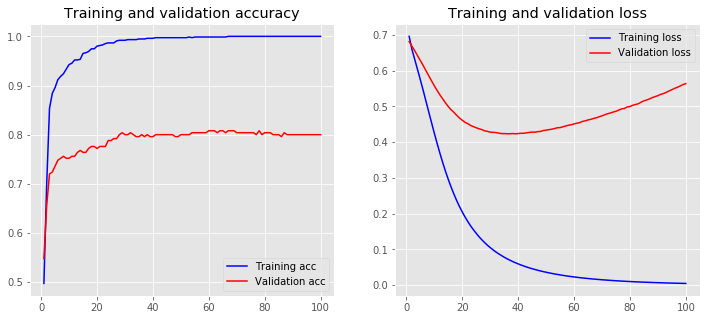

In [58]:
plot_history(history)

Explain these graphs. If you see any issue, suggest a solution to resolve it

Instead of relu function for first layer we can use sigmoid function , this will increase the accuracy by approx. 1.2 %
from 78.8% to 79.6% and validation loss function little smoother than the earlier one from relu function.
with the use of softmax function we can reduce error.

In [59]:
from keras.preprocessing.text import Tokenizer 
 
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(sentences_train) 
 
X_train = tokenizer.texts_to_sequences(sentences_train) 
X_test = tokenizer.texts_to_sequences(sentences_test) 
  
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index 
 
print(sentences_train[2])
print(X_train[2])

Of all the dishes, the salmon was the best, but all were great.
[11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22]


In [60]:
for word in ['the', 'all', 'happy', 'sad']:     
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 43
happy: 320
sad: 450


In [61]:
from keras.preprocessing.sequence import pad_sequences 
 
maxlen = 100 
 
# Pad variables with zeros  
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) 
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen) 
print(X_train[0, :]) 
 

[  1  10   3 282 739  25   8 208  30  64 459 230  13   1 124   5 231   8
  58   5  67   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [62]:
from keras.models import Sequential 
from keras import layers 
 
embedding_dim = 50 
 
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,                             
                           output_dim=embedding_dim,                            
                           input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D()) 
model.add(layers.Dense(10, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 87,871
Trainable params: 87,871
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8200


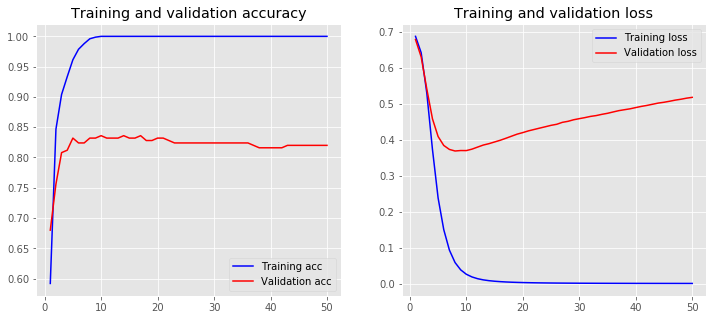

In [63]:
history = model.fit(X_train, y_train,                     
                    epochs=50,                     
                    verbose=False,                     
                    validation_data=(X_test, y_test),                    
                    batch_size=10) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False) 
print("Testing Accuracy:  {:.4f}".format(accuracy)) 
plot_history(history) 

#interpretaion of results and  recommendation to improve the accuracy

 Left graph show accuracy of model and right graph show loss of the model at certain epochs. 
 For sample of 5000 embedded word test accuracy is 82% , First accuracy increases to around 85% till 15 epochs
and decreases to 82% for epochs at 50,it shows that addition of more epochs after 15 does not affect the accuracy 
of the model.Here loss function binary cross entropy increases unproportionally compared to the small drop in accuracy
, which shows that model can be overfitting.We can overcome from overfitting by 


Increasing the sample of words to be tokenize : increases test accuracy by 1.3%

Reducing the network's capacity

Applying regularization
 
using dropout layers


In [64]:
#Reducing the network's capacity

from keras.models import Sequential 
from keras import layers 
 
embedding_dim = 50 
 
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,                             
                           output_dim=embedding_dim,                            
                           input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D()) 
model.add(layers.Dense(5, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 87,611
Trainable params: 87,611
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8280


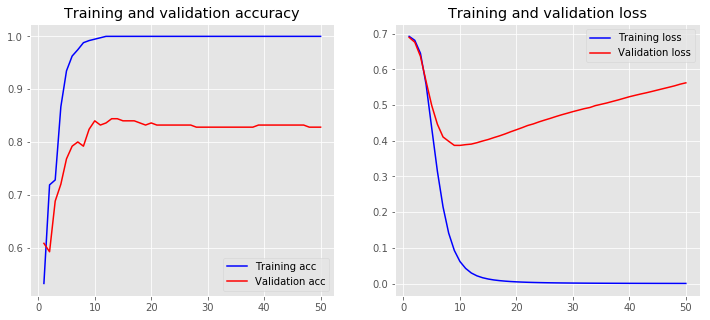

In [65]:
history = model.fit(X_train, y_train,                     
                    epochs=50,                     
                    verbose=False,                     
                    validation_data=(X_test, y_test),                    
                    batch_size=10) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False) 
print("Testing Accuracy:  {:.4f}".format(accuracy)) 
plot_history(history) 

In [74]:
#Applying regularization
import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential 
from keras import layers 
 
embedding_dim = 50 
 
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,                             
                           output_dim=embedding_dim,                            
                           input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D()) 
model.add(layers.Dense(10, activation='relu'))
keras.layers.ActivityRegularization(l1=0.001, l2=0.000)

model.add(layers.Dense(1,activation='sigmoid')) 
keras.layers.ActivityRegularization(l1=0.001, l2=0.00)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_20 (Glo (None, 50)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 11        
Total params: 87,871
Trainable params: 87,871
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8280


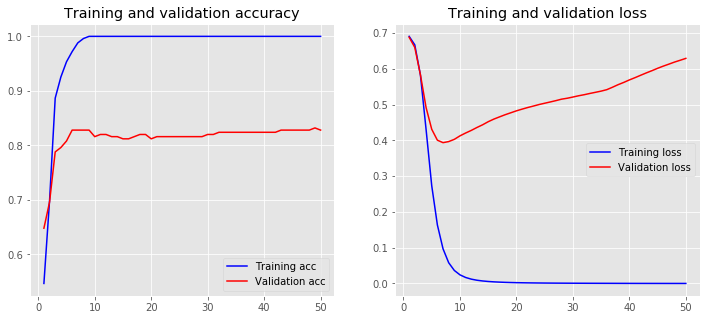

In [75]:
history = model.fit(X_train, y_train,                     
                    epochs=50,                     
                    verbose=False,                     
                    validation_data=(X_test, y_test),                    
                    batch_size=10) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False) 
print("Testing Accuracy:  {:.4f}".format(accuracy)) 
plot_history(history) 

In [72]:
#using dropout layers 
import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras import layers 
 
embedding_dim = 50 
 
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,                             
                           output_dim=embedding_dim,                            
                           input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D()) 
model.add(layers.Dense(10, activation='relu'))
keras.layers.Dropout(0.5)

model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 87,871
Trainable params: 87,871
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8080


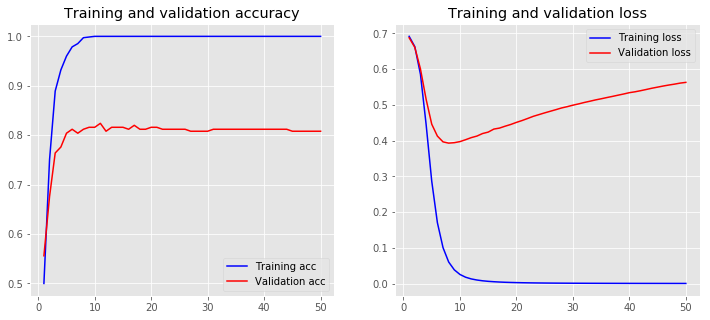

In [73]:
history = model.fit(X_train, y_train,                     
                    epochs=50,                     
                    verbose=False,                     
                    validation_data=(X_test, y_test),                    
                    batch_size=10) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False) 
print("Testing Accuracy:  {:.4f}".format(accuracy)) 
plot_history(history) 